In [70]:
import pandas as pd

# pd.read_excel(national_test_file_path,skiprows=8 )

national_test_file_path = "data/riket2023_åk9_np.xlsx"

sheet_names = pd.ExcelFile("data/riket2023_åk9_np.xlsx").sheet_names

df_dict = {}
for sheet_name in sheet_names[:-1]:
    df_dict[sheet_name] = pd.read_excel(
        national_test_file_path, skiprows=8, sheet_name=sheet_name
    )

df_dict.keys()

dict_keys(['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk'])

In [71]:
df_dict["Engelska"]

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


In [72]:
subjects = list(df_dict.keys())
subjects

['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']

In [73]:
df_dict["Engelska"].columns

Index(['Riket', 'Typ av huvudman', 'Totalt', 'Flickor', 'Pojkar', 'Totalt ',
       'Flickor ', 'Pojkar ', 'Totalt  ', 'Flickor  ', 'Pojkar  '],
      dtype='object')

In [74]:
import numpy as np

postfixes = [""] * 2 + [" (A-F)"] * 3 + [" (A-E)"] * 3 + [" (poäng)"] * 3

np.array(postfixes)

array(['', '', ' (A-F)', ' (A-F)', ' (A-F)', ' (A-E)', ' (A-E)', ' (A-E)',
       ' (poäng)', ' (poäng)', ' (poäng)'], dtype='<U8')

In [75]:
df_dict["Engelska"].columns.str.strip() + np.array(postfixes)

Index(['Riket', 'Typ av huvudman', 'Totalt (A-F)', 'Flickor (A-F)',
       'Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)',
       'Totalt (poäng)', 'Flickor (poäng)', 'Pojkar (poäng)'],
      dtype='object')

In [76]:
from copy import deepcopy

df_dict_cleaned = deepcopy(df_dict)
for subject in subjects:
    new_columns = df_dict_cleaned[subject].columns.str.strip() + np.array(postfixes)
    df_dict_cleaned[subject].columns = new_columns
    df_dict_cleaned[subject]=df_dict_cleaned[subject].rename({"Riket":"Plats","Typ av huvudman":"Huvudman"}, axis=1)

df_dict_cleaned["Matematik"]




,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [77]:
df_dict_cleaned["Matematik"]

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [78]:
df_dict_cleaned["Matematik"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Plats            4 non-null      object 
 1   Huvudman         4 non-null      object 
 2   Totalt (A-F)     4 non-null      int64  
 3   Flickor (A-F)    4 non-null      int64  
 4   Pojkar (A-F)     4 non-null      int64  
 5   Totalt (A-E)     4 non-null      object 
 6   Flickor (A-E)    4 non-null      object 
 7   Pojkar (A-E)     4 non-null      object 
 8   Totalt (poäng)   4 non-null      float64
 9   Flickor (poäng)  4 non-null      float64
 10  Pojkar (poäng)   4 non-null      float64
dtypes: float64(3), int64(3), object(5)
memory usage: 484.0+ bytes


In [79]:
df_dict_cleaned["Matematik"]["Totalt (A-F)"]

0    106766
1     84163
2     22553
3        50
Name: Totalt (A-F), dtype: int64

In [80]:
df_dict_cleaned["Matematik"].columns

Index(['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', 'Pojkar (A-F)',
       'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (poäng)',
       'Flickor (poäng)', 'Pojkar (poäng)'],
      dtype='object')

In [83]:
df_dict_cleaned["Matematik"].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Totalt (A-F),4.0,53383.000,50305.900509,50.0,16927.250,53358.00,89813.750,106766.0
Flickor (A-F),4.0,25774.000,24187.203159,25.0,8359.000,25761.50,43176.500,51548.0
Pojkar (A-F),4.0,27609.000,26119.924770,25.0,8568.250,27596.50,46637.250,55218.0
Totalt (poäng),4.0,12.650,1.138713,11.6,11.825,12.45,13.275,14.1
Flickor (poäng),4.0,12.400,0.920145,11.5,11.725,12.30,12.975,13.5
Pojkar (poäng),4.0,12.875,1.357387,11.7,11.925,12.55,13.500,14.7


In [87]:
df_dict_cleaned["Matematik"][["Huvudman","Totalt (poäng)"]]

,Huvudman,Totalt (poäng)
0,Samtliga,11.9
1,Kommunal,11.6
2,Enskild,13.0
3,Skolverket,14.1


In [88]:
df_math = df_dict_cleaned["Matematik"]
df_math

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [94]:
import duckdb

total_students = duckdb.query(
    """
    SELECT "Totalt (A-F)"
    FROM df_math
    WHERE huvudman = 'Samtliga'
    """
).df().values[0][0]

total_students

np.int64(106766)

In [98]:
students_passed = df_math.query("Huvudman == 'Samtliga'")["Totalt (A-E)"]*.01 *total_students
students_passed

0    95128.506
Name: Totalt (A-E), dtype: object

In [100]:
students_failed =total_students-students_passed
students_failed[0]

11637.493999999992

In [102]:
total_points ={}

df_dict_cleaned["Engelska"].query("Huvudman == 'Samtliga'")["Totalt (poäng)"][0]


np.float64(15.7)

In [103]:
for subject in subjects:
    total_points[subject]=df_dict_cleaned["Engelska"].query("Huvudman == 'Samtliga'")["Totalt (poäng)"][0]


total_points

{'Engelska': np.float64(15.7),
 'Matematik': np.float64(15.7),
 'Svenska': np.float64(15.7),
 'Svenska som andraspråk': np.float64(15.7)}

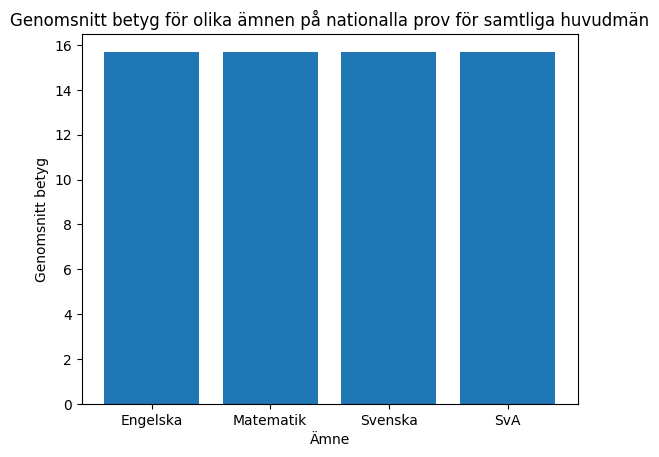

In [106]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1)
ax.bar(x=total_points.keys(), height=total_points.values())
ax.set(xlabel="Ämne", ylabel="Genomsnitt poäng", title="Genomsnitt poäng för olika ämnen på nationalla prov för samtliga huvudmän")
subjects[-1] ="SvA"
ax.set_xticks(labels=subjects, ticks=range(len(subjects)))
